In [61]:
from qiskit import *

from matplotlib import style
style.use("dark_background")

In [32]:
# For Jupyter Notebooks:
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [33]:
qc = QuantumCircuit()

In [34]:
qr = QuantumRegister(2,'qreg') # qreg (as in quantum register)

In [35]:
qc.add_register( qr )

qc.qregs

[QuantumRegister(2, 'qreg')]

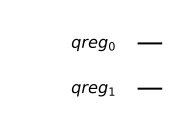

In [36]:
qc.draw(output='mpl')

In [37]:
qc.h(qr[0])

In [38]:
qc.cx(qr[0], qr[1]); # the ; suppresses the output

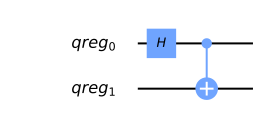

In [39]:
qc.draw(output='mpl')

Statevector simulator

In [40]:
vector_sim = Aer.get_backend('statevector_simulator')

In [41]:
# All simulators:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [42]:
job = execute(qc, vector_sim) # exexute (quantum circuit, Statevector simulator)

In [43]:
ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865475+0j)


This is the vector for a Bell state (∣00⟩+∣11⟩)/√2, which is what we'd expect given the circuit.

Lets initialize a circuit with an arbitrary pure state.

In [50]:
new_qc = QuantumCircuit(qr)

new_qc.initialize(ket, qr) # initializing with the same job results from the statevector as before on the same quantum register

In [51]:
# A classical register will define where the results will go
cr = ClassicalRegister(2,'creg')

qc.add_register(cr)

CircuitError: 'register name "creg" already exists'

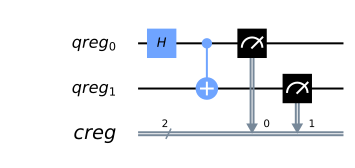

In [52]:
qc.measure(qr[0],cr[0]) # we are measuring the 0 qubit and mapping the results to the 0 classical bit.
qc.measure(qr[1],cr[1]) # -//-

qc.draw(output='mpl')

In [53]:
emulator = Aer.get_backend('qasm_simulator')

job = execute( qc, emulator, shots=8192 )

In [59]:
hist = job.result().get_counts()
print(hist)

{'11': 4088, '00': 4104}


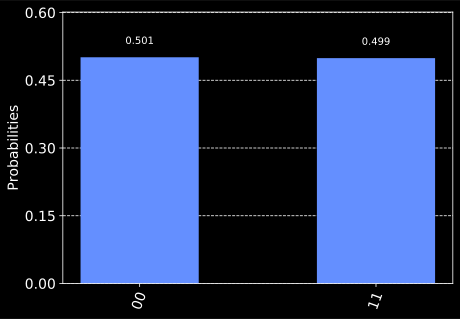

In [62]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)

In [63]:
job = execute(qc, emulator, shots=10, memory=True)
samples = job.result().get_memory()
print(samples)

['00', '11', '11', '00', '11', '11', '11', '00', '11', '11']


Note that the bits are labelled from right to left. So cr[0] is the one to the furthest right, and so on.

In [72]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
circuit = QuantumCircuit(qubit,bit)

circuit.x(qubit[7])
circuit.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

execute(circuit, emulator, shots=8192).result().get_counts()

{'10000000': 8192}

In [74]:
qc = QuantumCircuit(3) # a single quantum register consisting of three qubits, and no classical register.

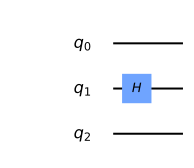

In [75]:
qc.h(1)

qc.draw(output='mpl')

In [76]:
qc = QuantumCircuit(2,1)

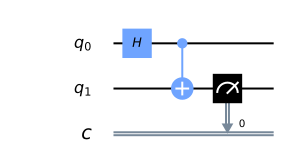

In [77]:
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw(output='mpl')

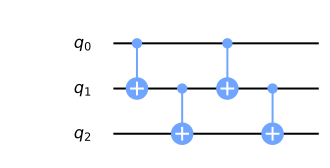

In [78]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw(output='mpl')

Turning the above cirucit into a gate

In [79]:
toggle_cx = sub_circuit.to_instruction()

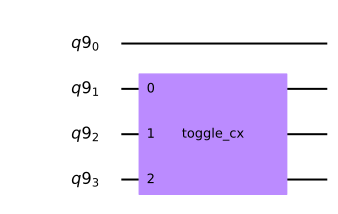

In [80]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])

new_qc.draw(output='mpl')

In [81]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

See all real backends

In [82]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [84]:
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=6, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.1.0', operational=True, pending_jobs=174, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=5, status_msg='active')
BackendSt

In [85]:
real_device = provider.get_backend('ibmq_burlington')

In [86]:
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

In [87]:
from qiskit.providers.aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(properties)

In [88]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)

job = execute(qc, emulator, shots=1024, noise_model=noise_model,
                    coupling_map=coupling_map,
                    basis_gates=noise_model.basis_gates)

job.result().get_counts()

{'01': 1, '00': 66, '11': 27, '10': 930}